# Pemrosesan

In [1]:
import pandas as pd
data = pd.read_csv('OLX Selenium Bs4.csv')
data.head()

,Properti_Name,Price,Lokasi,Detail
0,"Dijual Rumah Siap Huni, Lingkungan Komplek di ...",Rp 6.000.000.000,"Kebayoran Baru, Jakarta Selatan",3 KT - 3 KM - 260 m2
1,Di Jual Cepat Rumah Ragunan Harga Murah,Rp 2.100.000.000,"Pasar Minggu, Jakarta Selatan",3 KT - 3 KM - 139 m2
2,Kebayoran Baru lokasi dekat stasiun MRT dan Pa...,Rp 5.800.000.000,"Kebayoran Baru, Jakarta Selatan",10 KT - 3 KM - 237 m2
3,South Quarter Residence Tipe 1 BR + Study,Rp 2.617.738.820,"Cilandak, Jakarta Selatan",1 KT - 1 KM - 60 m2
4,Dijual Rumah Pondok Indah Brand New Ada Swimmi...,Rp 9.300.000.000,"Jakarta Selatan, Jakarta D.K.I.",3 KT - 2 KM - 390 m2


In [42]:
print (data.isnull().sum())
print (data.shape)

Properti_Name    0
Price            0
Lokasi           0
Detail           0
dtype: int64
(510, 4)


## Split Detail Menjadi Kolom Kamar Mandi, Kamar Tidur, Luas Bangunan

In [43]:
def extract_kt(value):
    kt = value.split('-')[0].replace('KT', '').strip()
    return int(kt.replace('>', '')) if '>' in kt else int(kt)

def extract_km(value):
    km = value.split('-')[1].replace('KM', '').strip()
    return int(km.replace('>', '')) if '>' in km else int(km)

def extract_luas(value):
    luas = value.split('-')[2].replace('m2', '').strip()
    return float(luas)

data['Kamar_Mandi'] = data['Detail'].apply(extract_km)
data['Kamar_Tidur'] = data['Detail'].apply(extract_kt)
data['Luas_Bangunan'] = data['Detail'].apply(extract_luas)

In [44]:
data.drop(["Detail"], inplace=True,axis=1)
data.head()

,Properti_Name,Price,Lokasi,Kamar_Mandi,Kamar_Tidur,Luas_Bangunan
0,"Dijual Rumah Siap Huni, Lingkungan Komplek di ...",Rp 6.000.000.000,"Kebayoran Baru, Jakarta Selatan",3,3,260.0
1,Di Jual Cepat Rumah Ragunan Harga Murah,Rp 2.100.000.000,"Pasar Minggu, Jakarta Selatan",3,3,139.0
2,Kebayoran Baru lokasi dekat stasiun MRT dan Pa...,Rp 5.800.000.000,"Kebayoran Baru, Jakarta Selatan",3,10,237.0
3,South Quarter Residence Tipe 1 BR + Study,Rp 2.617.738.820,"Cilandak, Jakarta Selatan",1,1,60.0
4,Dijual Rumah Pondok Indah Brand New Ada Swimmi...,Rp 9.300.000.000,"Jakarta Selatan, Jakarta D.K.I.",2,3,390.0


## Hapus Jakarta Selatan Pada Kolom Lokasi

In [45]:
data['Lokasi'] = data['Lokasi'].str.split(',').str[0]
data.head()

,Properti_Name,Price,Lokasi,Kamar_Mandi,Kamar_Tidur,Luas_Bangunan
0,"Dijual Rumah Siap Huni, Lingkungan Komplek di ...",Rp 6.000.000.000,Kebayoran Baru,3,3,260.0
1,Di Jual Cepat Rumah Ragunan Harga Murah,Rp 2.100.000.000,Pasar Minggu,3,3,139.0
2,Kebayoran Baru lokasi dekat stasiun MRT dan Pa...,Rp 5.800.000.000,Kebayoran Baru,3,10,237.0
3,South Quarter Residence Tipe 1 BR + Study,Rp 2.617.738.820,Cilandak,1,1,60.0
4,Dijual Rumah Pondok Indah Brand New Ada Swimmi...,Rp 9.300.000.000,Jakarta Selatan,2,3,390.0


## Pengkategorian Rumah atau Apartemen

In [46]:
import re

def extract_property_type(name):
    if re.search(r"rumah|house|hunian|cluster|furnished|mansion|terrace|kos|kost|rmh|homie|villa|perumahan|townhouse|bangunan|gedung|home|simatupang|ajb|ruman|kebayoran|brand", name, re.IGNORECASE):
        return "Rumah"
    elif re.search(r"apartemen|apartment|residence|apt|tower|condotel|antasari|resd|avenue|shm", name, re.IGNORECASE):
        return "Apartemen"
    else:
        return None

data['Properti_Type'] = data['Properti_Name'].apply(extract_property_type)


In [47]:
data_none = data[data['Properti_Type'].isna()]
print(data_none)

Empty DataFrame
Columns: [Properti_Name, Price, Lokasi, Kamar_Mandi, Kamar_Tidur, Luas_Bangunan, Properti_Type]
Index: []


## Hapus RP Pada Kolom Price

In [48]:
data['Price'] = data['Price'].str.replace(r'[^\d]', '', regex=True)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data.head()

,Properti_Name,Price,Lokasi,Kamar_Mandi,Kamar_Tidur,Luas_Bangunan,Properti_Type
0,"Dijual Rumah Siap Huni, Lingkungan Komplek di ...",6000000000,Kebayoran Baru,3,3,260.0,Rumah
1,Di Jual Cepat Rumah Ragunan Harga Murah,2100000000,Pasar Minggu,3,3,139.0,Rumah
2,Kebayoran Baru lokasi dekat stasiun MRT dan Pa...,5800000000,Kebayoran Baru,3,10,237.0,Rumah
3,South Quarter Residence Tipe 1 BR + Study,2617738820,Cilandak,1,1,60.0,Apartemen
4,Dijual Rumah Pondok Indah Brand New Ada Swimmi...,9300000000,Jakarta Selatan,2,3,390.0,Rumah


## Pengecekan dan Penanganan Outlier Kolom Price

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<Axes: ylabel='Price'>

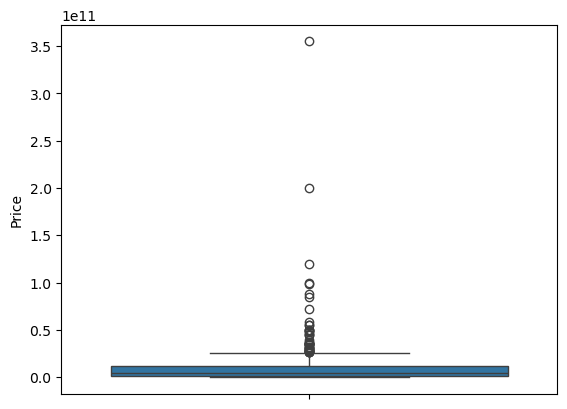

In [50]:
sns.boxplot(data['Price'])

In [51]:
#membuat fungsi cek outlier.
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(data[nama_kolom] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(data[nama_kolom] <= (Q1 - 1.5*IQR))
  return list(bound[0])

In [52]:
#menjalankan fungsi untuk mendapatkan index data yang merupakan outlier
upper_Price= cek_outlier('Price', 'upper_bound')
lower_Price = cek_outlier('Price', 'lower_bound')
print(f"Jumlah total outlier di kolom Price : {len(upper_Price) + len(lower_Price)}")

#menghitung batas bawah dan atas
Q1 = np.percentile(data['Price'], 25, interpolation='midpoint')
Q3 = np.percentile(data['Price'], 75, interpolation='midpoint')
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Price'] = data['Price'].clip(lower=lower_bound, upper=upper_bound) # Now using calculated lower_bound and upper_bound

Jumlah total outlier di kolom Price : 44


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11184\427787737.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  upper_Price= cek_outlier('Price', 'upper_bound')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11184\427787737.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  lower_Price = cek_outlier('Price', 'lower_bound')


<Axes: ylabel='Price'>

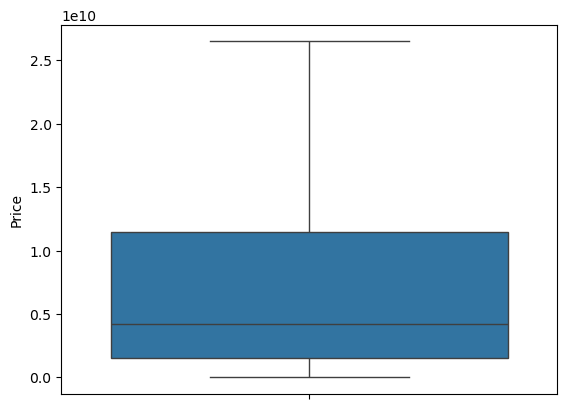

In [53]:
sns.boxplot(data['Price'])

## Pengelompokkan Price Menjadi Kategori Murah, Sedang, dan Mahal

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11184\139619767.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'], kde=True, hist=True)


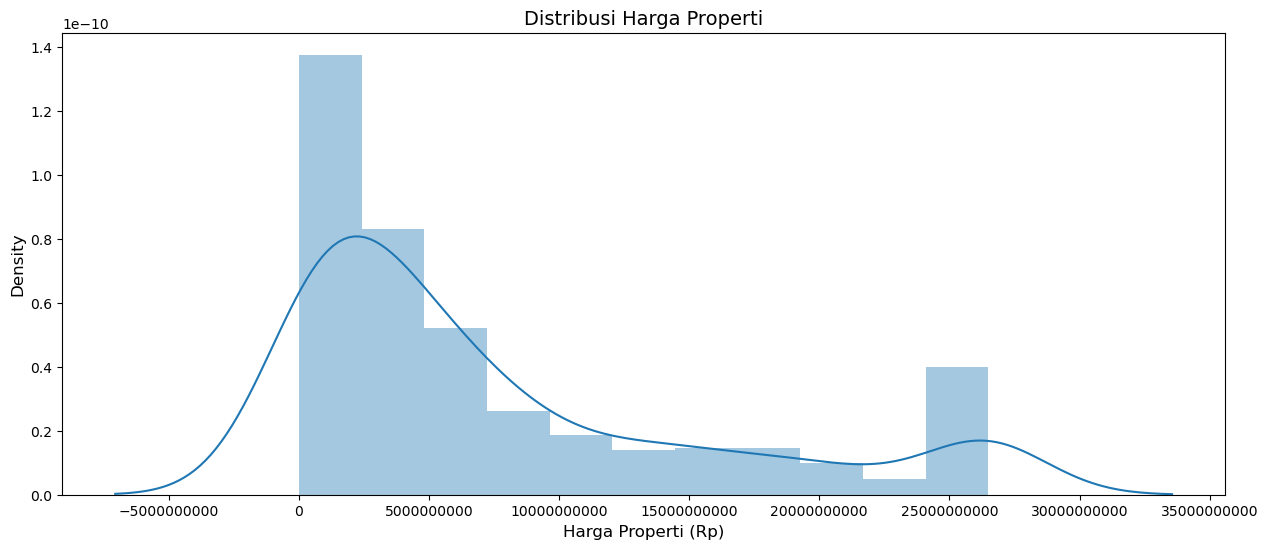

In [54]:
#membuat distplot dengan harga asli
plt.figure(figsize=(15, 6))
sns.distplot(data['Price'], kde=True, hist=True)

#memastikan label sumbu x menunjukkan harga asli
plt.title('Distribusi Harga Properti', fontsize=14)
plt.xlabel('Harga Properti (Rp)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')  # Menonaktifkan format ilmiah untuk sumbu x
plt.show()

In [55]:
#membuat kategori berdasarkan rentang harga
data['Price_Category'] = pd.cut(
    data['Price'],
    bins=[0, 12500000000, 25000000000, float('inf')],
    labels=['Murah', 'Sedang', 'Mahal']
)

#menampilkan hasil
data.head()

,Properti_Name,Price,Lokasi,Kamar_Mandi,Kamar_Tidur,Luas_Bangunan,Properti_Type,Price_Category
0,"Dijual Rumah Siap Huni, Lingkungan Komplek di ...",6000000000,Kebayoran Baru,3,3,260.0,Rumah,Murah
1,Di Jual Cepat Rumah Ragunan Harga Murah,2100000000,Pasar Minggu,3,3,139.0,Rumah,Murah
2,Kebayoran Baru lokasi dekat stasiun MRT dan Pa...,5800000000,Kebayoran Baru,3,10,237.0,Rumah,Murah
3,South Quarter Residence Tipe 1 BR + Study,2617738820,Cilandak,1,1,60.0,Apartemen,Murah
4,Dijual Rumah Pondok Indah Brand New Ada Swimmi...,9300000000,Jakarta Selatan,2,3,390.0,Rumah,Murah


## Pengecekan dan Penanganan Outlier Kolom Luas Bangunan

<Axes: ylabel='Luas_Bangunan'>

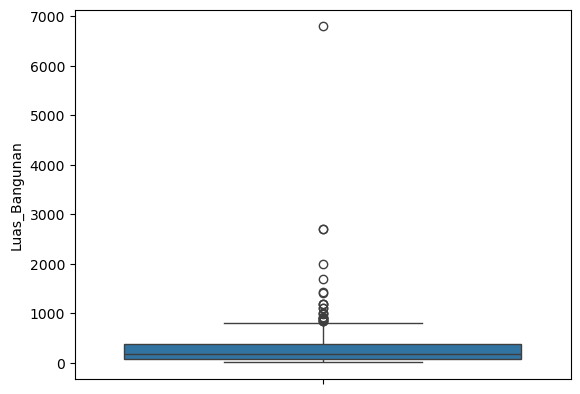

In [56]:
sns.boxplot(data['Luas_Bangunan'])

In [57]:
#membuat fungsi cek outlier.
def cek_outlier(nama_kolom, batas):
  Q1 = np.percentile(data[nama_kolom], 25,
                     interpolation = 'midpoint')

  Q3 = np.percentile(data[nama_kolom], 75,
                     interpolation = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(data[nama_kolom] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(data[nama_kolom] <= (Q1 - 1.5*IQR))
  return list(bound[0])

In [58]:
#menjalankan fungsi untuk mendapatkan index data yang merupakan outlier
upper_Luas= cek_outlier('Luas_Bangunan', 'upper_bound')
lower_Luas = cek_outlier('Luas_Bangunan', 'lower_bound')
print(f"Jumlah total outlier di kolom Luas_Bangunan : {len(upper_Luas) + len(lower_Luas)}")

#menghitung batas bawah dan atas
Q1 = np.percentile(data['Luas_Bangunan'], 25, interpolation='midpoint')
Q3 = np.percentile(data['Luas_Bangunan'], 75, interpolation='midpoint')
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['Luas_Bangunan'] = data['Luas_Bangunan'].clip(lower=lower_bound, upper=upper_bound)

Jumlah total outlier di kolom Luas_Bangunan : 24


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11184\1313001475.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  upper_Luas= cek_outlier('Luas_Bangunan', 'upper_bound')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11184\1313001475.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  lower_Luas = cek_outlier('Luas_Bangunan', 'lower_bound')


<Axes: ylabel='Luas_Bangunan'>

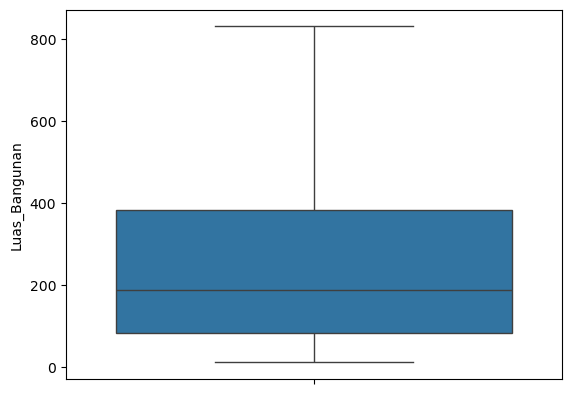

In [59]:
sns.boxplot(data['Luas_Bangunan'])

## Pengelompokkan Luas Bangunan Menjadi Kategori Sempit, Sedang, dan Luas

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11184\2341509980.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Luas_Bangunan'], kde=True, hist=True)


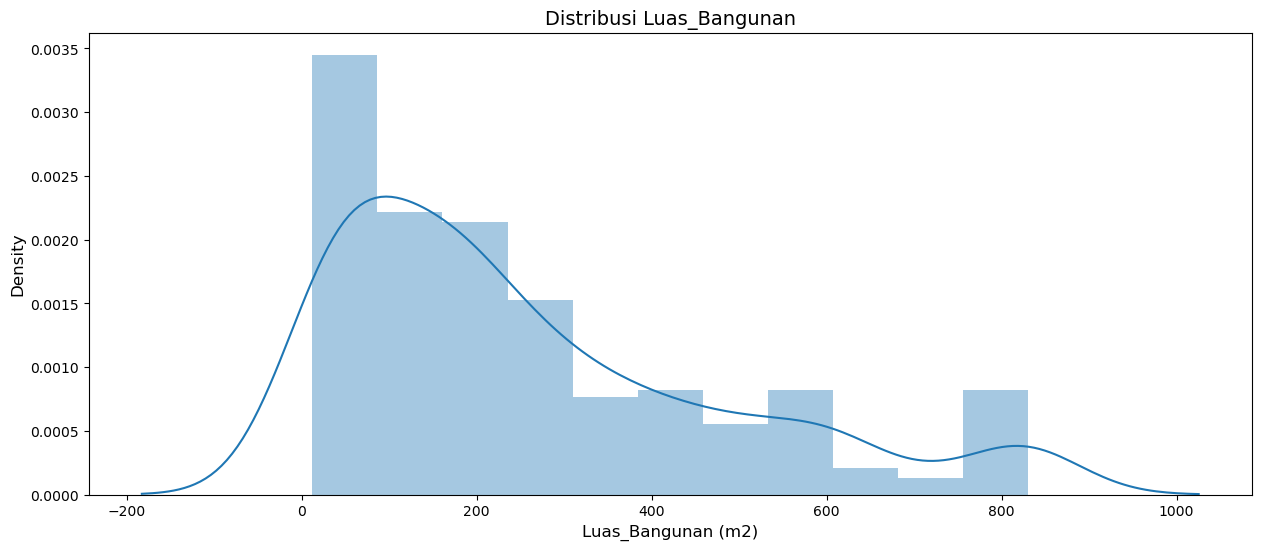

In [60]:
#membuat distplot dengan luas bangunan
plt.figure(figsize=(15, 6))
sns.distplot(data['Luas_Bangunan'], kde=True, hist=True)

#memastikan label sumbu x menunjukkan luas bangunan
plt.title('Distribusi Luas_Bangunan', fontsize=14)
plt.xlabel('Luas_Bangunan (m2)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')  # Menonaktifkan format ilmiah untuk sumbu x
plt.show()

In [61]:
#membuat kategori berdasarkan rentang luas bangunan
data['Luas_Bangunan'] = pd.cut(
    data['Luas_Bangunan'],
    bins=[0, 400, 800, float('inf')],
    labels=['Sempit', 'Sedang', 'Luas']
)

#menampilkan hasil
data.head()

,Properti_Name,Price,Lokasi,Kamar_Mandi,Kamar_Tidur,Luas_Bangunan,Properti_Type,Price_Category
0,"Dijual Rumah Siap Huni, Lingkungan Komplek di ...",6000000000,Kebayoran Baru,3,3,Sempit,Rumah,Murah
1,Di Jual Cepat Rumah Ragunan Harga Murah,2100000000,Pasar Minggu,3,3,Sempit,Rumah,Murah
2,Kebayoran Baru lokasi dekat stasiun MRT dan Pa...,5800000000,Kebayoran Baru,3,10,Sempit,Rumah,Murah
3,South Quarter Residence Tipe 1 BR + Study,2617738820,Cilandak,1,1,Sempit,Apartemen,Murah
4,Dijual Rumah Pondok Indah Brand New Ada Swimmi...,9300000000,Jakarta Selatan,2,3,Sempit,Rumah,Murah


## Penghapusan Kolom

In [62]:
data.drop(["Price"], inplace=True,axis=1)
data.head()

,Properti_Name,Lokasi,Kamar_Mandi,Kamar_Tidur,Luas_Bangunan,Properti_Type,Price_Category
0,"Dijual Rumah Siap Huni, Lingkungan Komplek di ...",Kebayoran Baru,3,3,Sempit,Rumah,Murah
1,Di Jual Cepat Rumah Ragunan Harga Murah,Pasar Minggu,3,3,Sempit,Rumah,Murah
2,Kebayoran Baru lokasi dekat stasiun MRT dan Pa...,Kebayoran Baru,3,10,Sempit,Rumah,Murah
3,South Quarter Residence Tipe 1 BR + Study,Cilandak,1,1,Sempit,Apartemen,Murah
4,Dijual Rumah Pondok Indah Brand New Ada Swimmi...,Jakarta Selatan,2,3,Sempit,Rumah,Murah


In [63]:
data.drop(["Properti_Name"], inplace=True,axis=1)
data.head()

,Lokasi,Kamar_Mandi,Kamar_Tidur,Luas_Bangunan,Properti_Type,Price_Category
0,Kebayoran Baru,3,3,Sempit,Rumah,Murah
1,Pasar Minggu,3,3,Sempit,Rumah,Murah
2,Kebayoran Baru,3,10,Sempit,Rumah,Murah
3,Cilandak,1,1,Sempit,Apartemen,Murah
4,Jakarta Selatan,2,3,Sempit,Rumah,Murah


In [64]:
data.to_excel('pelabelan_properti.xlsx', index=False)

# Analisis Data Eksplorasi (EDA)

In [2]:
data2 = pd.read_csv('properti_real_estate.csv')
data2.head()

,Lokasi,Kamar_Mandi,Kamar_Tidur,Luas_Bangunan,Properti_Type,Price_Category,Investasi
0,Kebayoran Baru,3,3,Sempit,Rumah,Murah,Layak
1,Pasar Minggu,3,3,Sempit,Rumah,Murah,Layak
2,Kebayoran Baru,3,10,Sempit,Rumah,Murah,Layak
3,Cilandak,1,1,Sempit,Apartemen,Murah,Tidak Layak
4,Jakarta Selatan,2,3,Sempit,Rumah,Murah,Tidak Layak


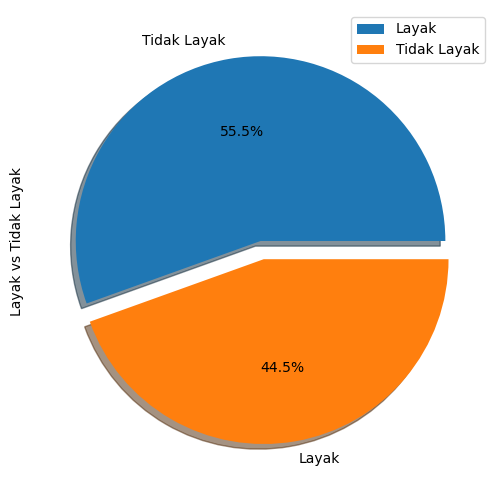

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

data2['Investasi'].value_counts().plot(kind='pie', explode=[0,0.1], figsize=(6,6), autopct='%1.1f%%', shadow=True)
plt.ylabel('Layak vs Tidak Layak')
plt.legend(['Layak', 'Tidak Layak'])
plt.show()

In [5]:
def stacked_bar(variable):
    locations = data2['Lokasi'].unique()
    percentages = []

    for lokasi in locations:
        counts = data2[data2['Lokasi'] == lokasi][variable].value_counts(normalize=True)
        percentages.append(counts)

    # Convert to DataFrame and fill missing values with 0
    dataset = pd.DataFrame(percentages, index=locations).fillna(0)

    # Plot the stacked bar chart
    dataset.plot(kind='bar', stacked=True, figsize=(10, 6), title=f"Presentase {variable} Berdasarkan Lokasi")
    plt.ylabel('Presentase')
    plt.xlabel('Lokasi')
    plt.xticks(rotation=45)
    plt.legend(title=variable, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Show the plot in Streamlit
    plt.show()

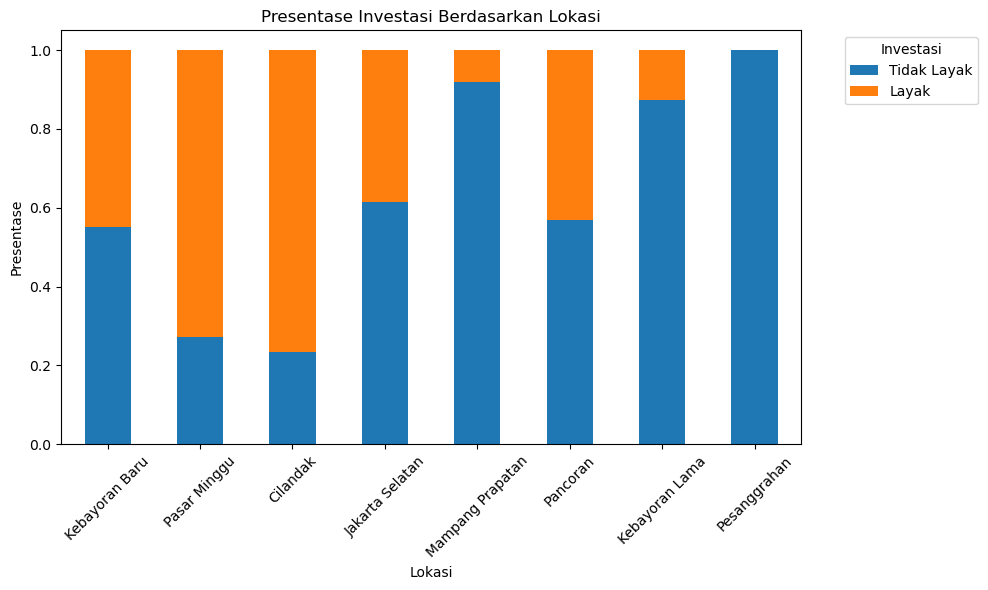

In [8]:
stacked_bar('Investasi')

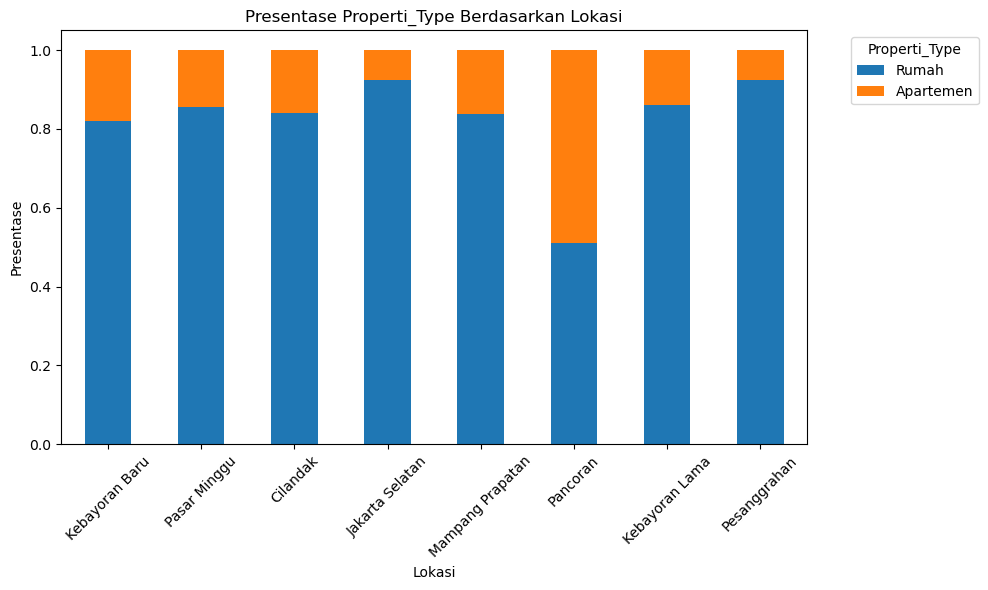

In [7]:
stacked_bar('Properti_Type')

# Encoding

## Label Encoder

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data2['Lokasi'] = label_encoder.fit_transform(data2['Lokasi'])

In [67]:
print("Hasil label ke angka:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Hasil label ke angka: {'Cilandak': 0, 'Jakarta Selatan': 1, 'Kebayoran Baru': 2, 'Kebayoran Lama': 3, 'Mampang Prapatan': 4, 'Pancoran': 5, 'Pasar Minggu': 6, 'Pesanggrahan': 7}


In [68]:
data2['Properti_Type'] = label_encoder.fit_transform(data2['Properti_Type'])
data2.head()

,Lokasi,Kamar_Mandi,Kamar_Tidur,Luas_Bangunan,Properti_Type,Price_Category,Investasi
0,2,3,3,Sempit,1,Murah,Layak
1,6,3,3,Sempit,1,Murah,Layak
2,2,3,10,Sempit,1,Murah,Layak
3,0,1,1,Sempit,0,Murah,Tidak Layak
4,1,2,3,Sempit,1,Murah,Tidak Layak


In [69]:
print("Mapping label asli ke angka:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping label asli ke angka: {'Apartemen': 0, 'Rumah': 1}


## Ordinal Encoder

In [70]:
from sklearn.preprocessing import OrdinalEncoder
categories = [['Sempit', 'Sedang', 'Luas']]
ordinal_encoder = OrdinalEncoder(categories=categories)
data2[['Luas_Bangunan']] = ordinal_encoder.fit_transform(data2[['Luas_Bangunan']])

In [71]:
categories = [['Murah', 'Sedang', 'Mahal']]
ordinal_encoder = OrdinalEncoder(categories=categories)
data2[['Price_Category']] = ordinal_encoder.fit_transform(data2[['Price_Category']])
data2.head()

,Lokasi,Kamar_Mandi,Kamar_Tidur,Luas_Bangunan,Properti_Type,Price_Category,Investasi
0,2,3,3,0.0,1,0.0,Layak
1,6,3,3,0.0,1,0.0,Layak
2,2,3,10,0.0,1,0.0,Layak
3,0,1,1,0.0,0,0.0,Tidak Layak
4,1,2,3,0.0,1,0.0,Tidak Layak


# Pemodelan

In [72]:
x = data2.drop('Investasi', axis=1)
y = data2['Investasi']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DT_pred = DT.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, DT_pred))

0.9673202614379085


In [75]:
pd.crosstab(y_test, DT_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,Layak,Tidak Layak,All
Actual,,,
Layak,63,3,66
Tidak Layak,2,85,87
All,65,88,153


## Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RF_pred = RF.predict(X_test)

print(accuracy_score(y_test, RF_pred))

0.934640522875817


In [77]:
pd.crosstab(y_test, RF_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,Layak,Tidak Layak,All
Actual,,,
Layak,62,4,66
Tidak Layak,6,81,87
All,68,85,153


## KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNN_pred = KNN.predict(X_test)

print(accuracy_score(y_test, KNN_pred))

0.8366013071895425


In [79]:
pd.crosstab(y_test, KNN_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,Layak,Tidak Layak,All
Actual,,,
Layak,53,13,66
Tidak Layak,12,75,87
All,65,88,153


# Inputan Model Decision Tree

In [80]:
#Lokasi=6(Pasar Minggu), Kamar Mandi=2, Kamar Tidur=3, Luas Bangunan=1(sedang), Properti Type=1(rumah), Price=0(murah)
import numpy as np
input_data = np.array([[6,2,3,1,1,0]])

prediction = DT.predict(input_data)
print('Prediksi Kelayakan Investasi Properti Real Estate di Daerah Jakarta Selatan :', prediction)

Prediksi Kelayakan Investasi Properti Real Estate di Daerah Jakarta Selatan : ['Layak']


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pickle

In [81]:
import pickle

filename = 'prediksi_investasi_properti.sav'
pickle.dump(DT,open(filename,'wb'))